# Projeto de algoritmos

#### Professor Mauricio Serrano

#### Davi Alves Bezerra - FGA UNB

#### Grafos1 - Sistema de recomendação baseado em grafos

---------------------------------------------------------------

Como visto, um grafo é capaz de representar conexões entre individuos, contas bancarias e até grupos mal intencionados. Há alguns datasets disponiveis pela universidade de [Stanford](https://snap.stanford.edu/data/) para analise de redes. Os dados foram coletados por meio de crawling do site da Amazon e contêm metadados de produtos e informações de revisão sobre 548.552 produtos diferentes (Livros, CDs de música, DVDs e fitas de vídeo VHS). Nesse projeto irei usar somente os livros a principio para diminuir a quantidade de dados. Há o total de 393561 livros, de gêneros diversos. Os dados usados são de 2006.

### Disposição dos dados:

- Id: Id do produto (numero entre 0, ..., 548551)
- ASIN: Amazon Standard Identification Number (Número de identificação padrão da Amazon)
- title: Nome ou titulo do produto
- group: Grupo do produto, ou tipo (Livro, DVD, Video or Musica)
- salesrank: Rank de vendas da Amazon
- similar: ASINs de produtos comprados em conjunto (as pessoas que compram X também compram Y)
- categories: Local na hierarquia de categorias do produto ao qual o produto pertence (separado por |, ID da categoria)
- reviews: Informações da avaliação do produto: tempo, ID do usuário, classificação, número total de votos na avaliação, número total de votos de utilidade (quantas pessoas acharam a avaliação útil)

In [ ]:
# Download
!wget https://snap.stanford.edu/data/bigdata/amazon/amazon-meta.txt.gz

In [ ]:
# unzip dataset
!gzip -dk amazon-meta.txt.gz

Agora vamos identificar o que poderia ser nossos nós e vertices para montar o grafo.
Inicialmente vamos criar uma rede de relacionamento usando apenas algumas compras para ter uma ideia.

In [3]:
from pyvis.network import Network
import graph_util
import book_recommendation as br
import pandas as pd
import numpy as np
import re

In [1]:
# read amazon-meta
with open('amazon-meta.txt', 'r', encoding="utf8", errors='ignore') as f:
    lines = f.readlines()

Em `num_samples` podemos escolher quantas compras vamos usar para visualizar a rede. Nesse exemplo usaremos 100 amostras.

In [4]:
num_samples = 100
dataset = br.get_sample_dataset(lines, num_samples)
dataset = ["".join(item) for item in dataset]

In [5]:
# filtro para remover os produtos que retornaram None, no caso alguns deles foram descontinuados
products_filtered = list(filter(None, [br.get_amazon_metadata(i) for i in dataset]))

In [6]:
book_names = [product[4] for product in products_filtered]

In [8]:
# junção das amostras para visualização
customer = list()
book = list()
stars = list()

for i in products_filtered:
    customer += i[1]
    book += i[2]
    stars += i[3]

br.create_visual_network(customer, book, stars)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


É interessante pensar que quando você pesquisa um livro na amazon, ela recomenda outros livros comprados por pessoas que também compraram o livro buscado.

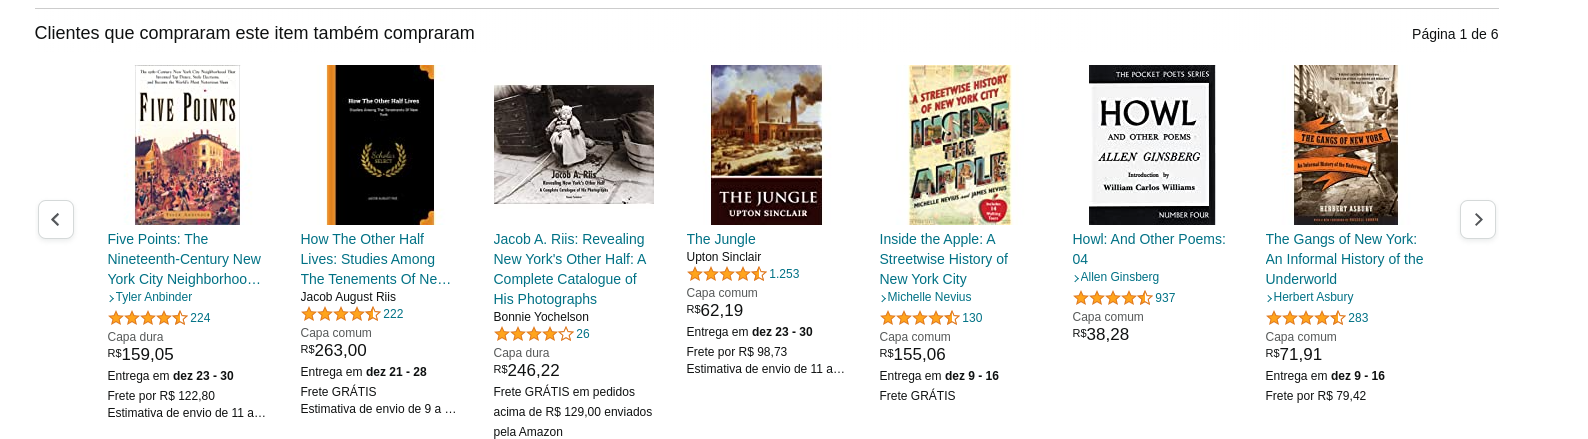

Pensando nisso podemos achar a possiveis recomendações usando DFS para mapear os componentes conectados a determinado livro em nosso grafo.
Após isso, podemos filtrar e rankear os livros pelas estrelas e até mesmo pela quantidade de pessoas que compraram os livros que queremos recomendar.

In [9]:
all_vertex_list, books, customers = br.get_vertex_list(products_filtered)
connected_components_g = br.get_components(all_vertex_list, products_filtered)

In [10]:
book_search = 'How the Other Half Lives: Studies Among the Tenements of New York'
results_qtd_customers, results_rating_mean = br.get_all_books(book_search, products_filtered, 
                                                           all_vertex_list, books, connected_components_g)

In [11]:
results_qtd_customers[:5]

[{'book_name': 'The Eagle Has Landed',
  'rating_mean': 4.5,
  'book_id': '0671727737',
  'qtd_customers': 46},
 {'book_name': 'Night of Many Dreams : A Novel',
  'rating_mean': 3.45,
  'book_id': '0312199406',
  'qtd_customers': 22},
 {'book_name': 'Becoming a Contagious Christian',
  'rating_mean': 4.0,
  'book_id': '0310485002',
  'qtd_customers': 21},
 {'book_name': 'How the Other Half Lives: Studies Among the Tenements of New York',
  'rating_mean': 4.24,
  'book_id': '0486220125',
  'qtd_customers': 17},
 {'book_name': 'The American Heritage Dictionary of Idioms',
  'rating_mean': 4.07,
  'book_id': '039572774X',
  'qtd_customers': 15}]

In [12]:
results_rating_mean[:5]

[{'book_name': 'Betsy & Tacy Go over the Big Hill (Betsy and Tacy Books)',
  'rating_mean': 5.0,
  'book_id': '0613100093',
  'qtd_customers': 4},
 {'book_name': 'Historia De Cancer De Una Dietista : Informacion & Inspiracion para la Recuperacion & Curacion Sobreviviente de tres canceres',
  'rating_mean': 5.0,
  'book_id': '0966723821',
  'qtd_customers': 4},
 {'book_name': 'How to Kill a Monster (Goosebumps)',
  'rating_mean': 4.8,
  'book_id': '0590568833',
  'qtd_customers': 10},
 {'book_name': 'Disney A to Z : The Updated Official Encyclopedia (Disney a to Z)',
  'rating_mean': 4.67,
  'book_id': '0786863919',
  'qtd_customers': 9},
 {'book_name': 'Black No More : A Novel (Modern Library (Paperback))',
  'rating_mean': 4.57,
  'book_id': '037575380X',
  'qtd_customers': 7}]